### Dependencies

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

#### Uploading Image

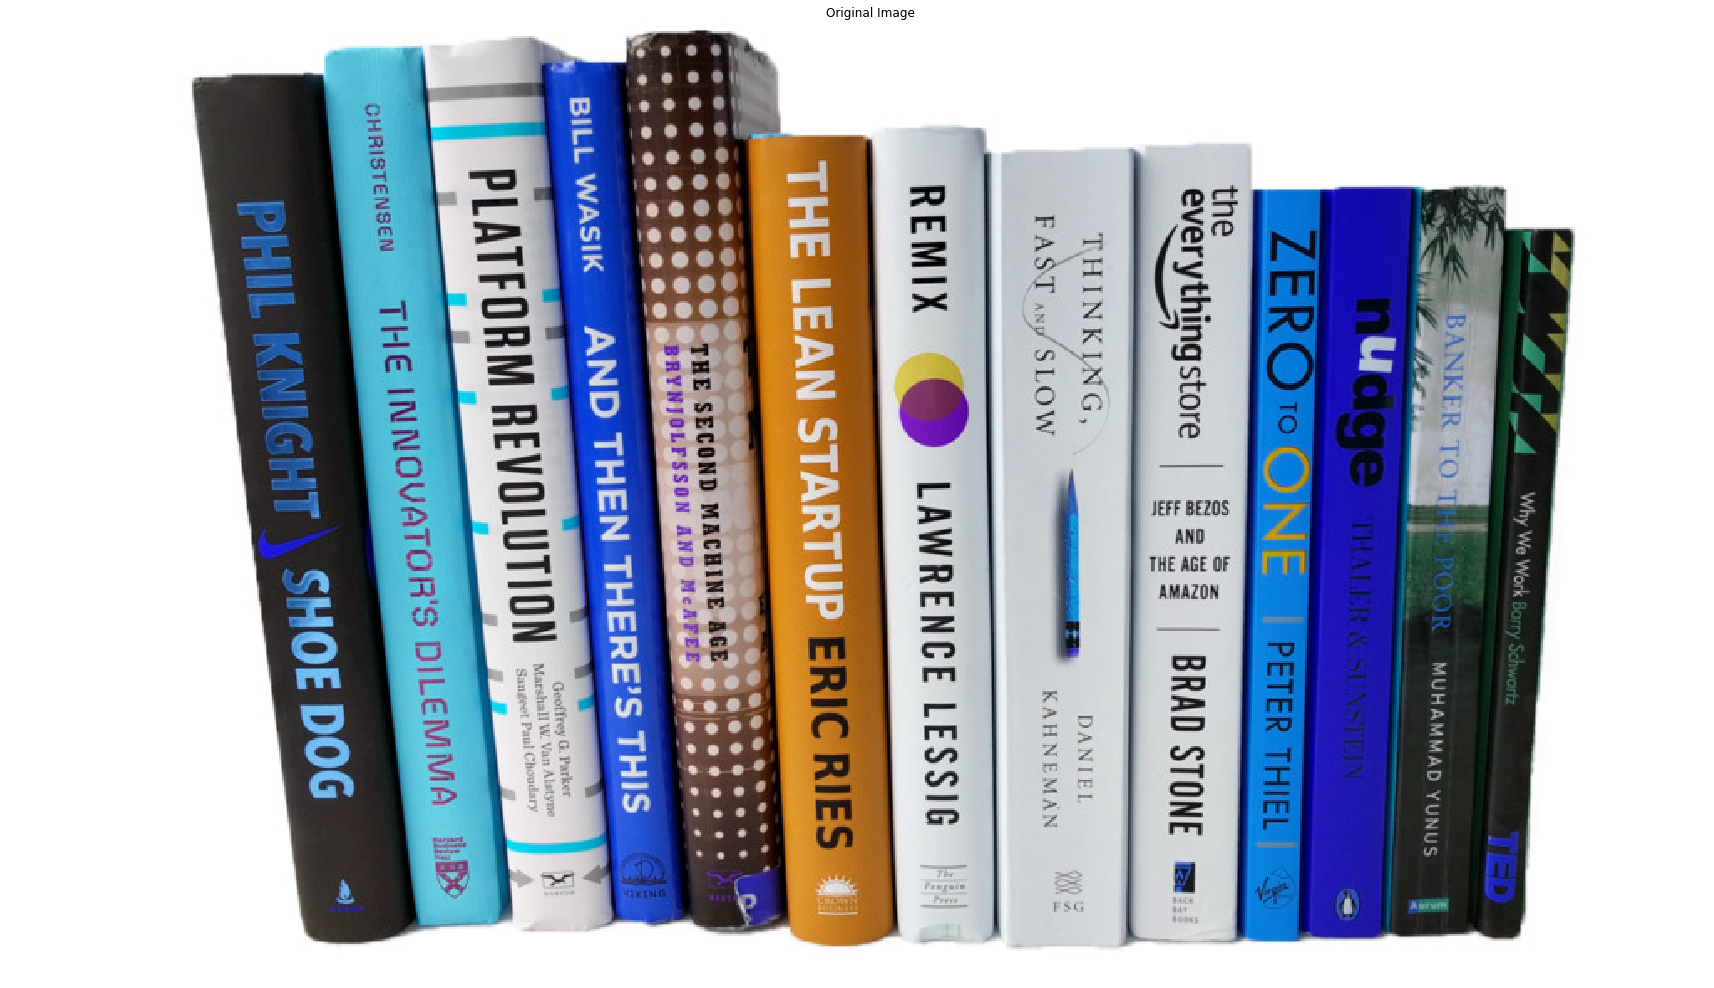

In [9]:
img = cv2.imread("B3.jpg")
plt.figure(figsize=(30,30)),plt.imshow(img, cmap = 'gray'),plt.title('Original Image'),plt.axis('off')
plt.show()

#### Converting to gray-scale

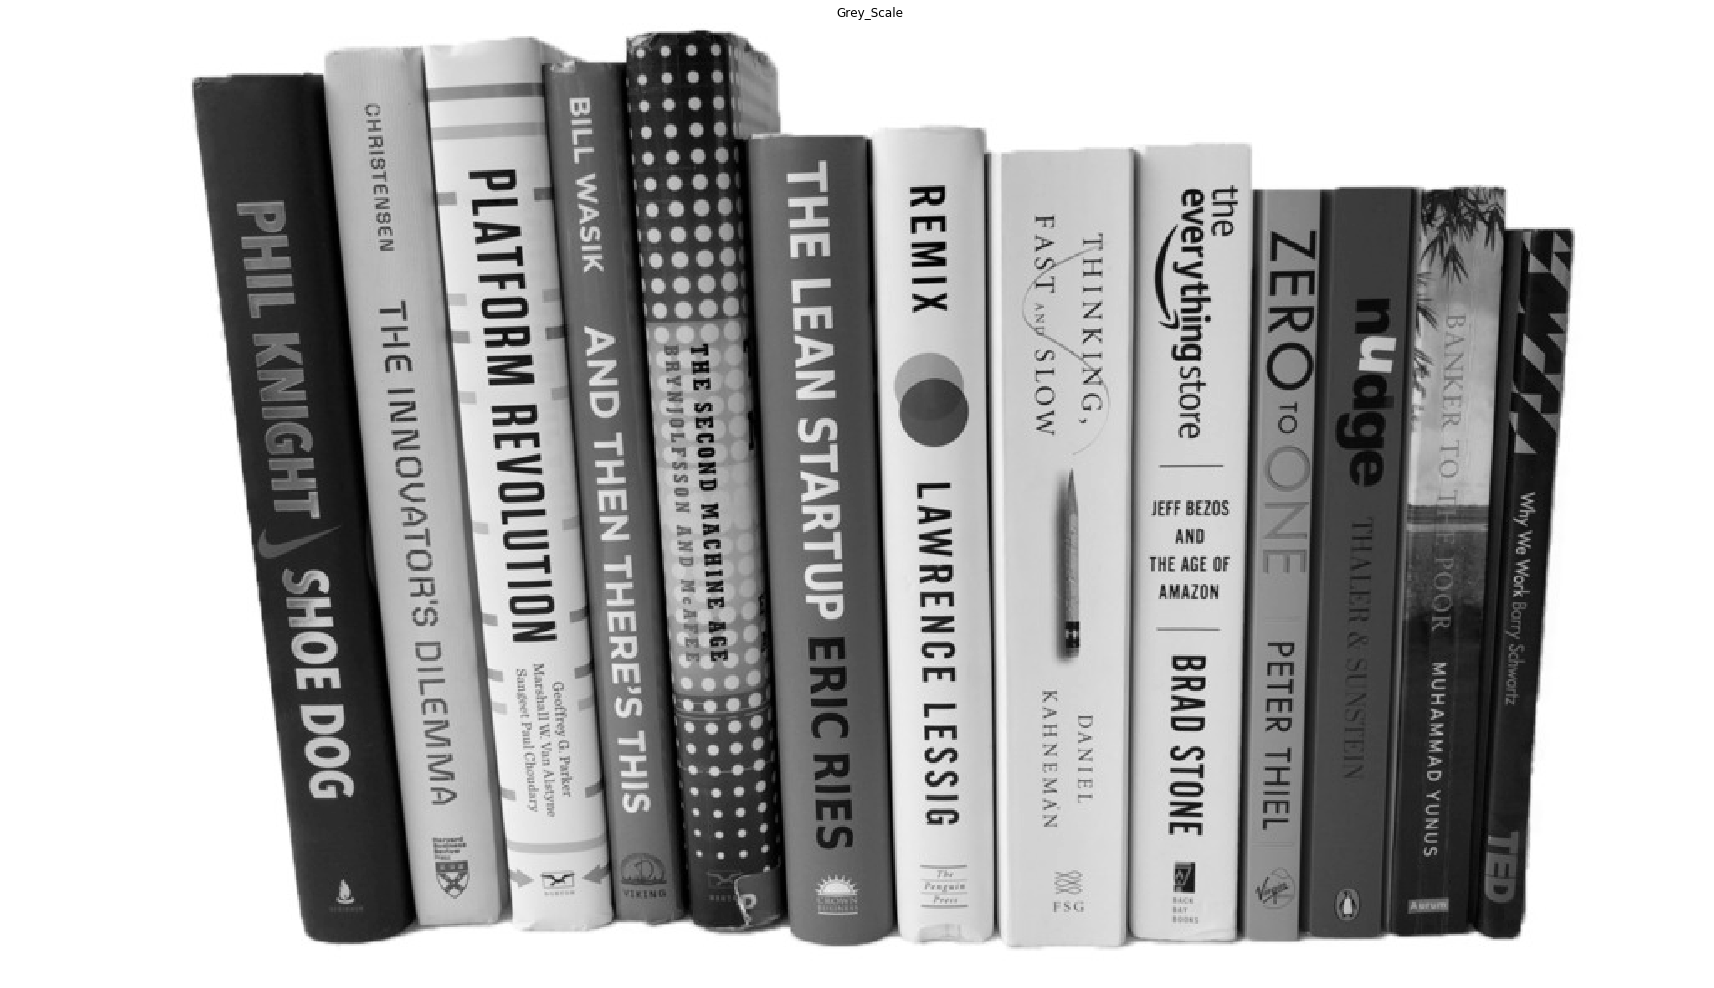

In [10]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(30,30)),plt.imshow(gray, cmap = 'gray'),plt.title('Grey_Scale'),plt.axis('off')
plt.show()

#### Blur image slightly

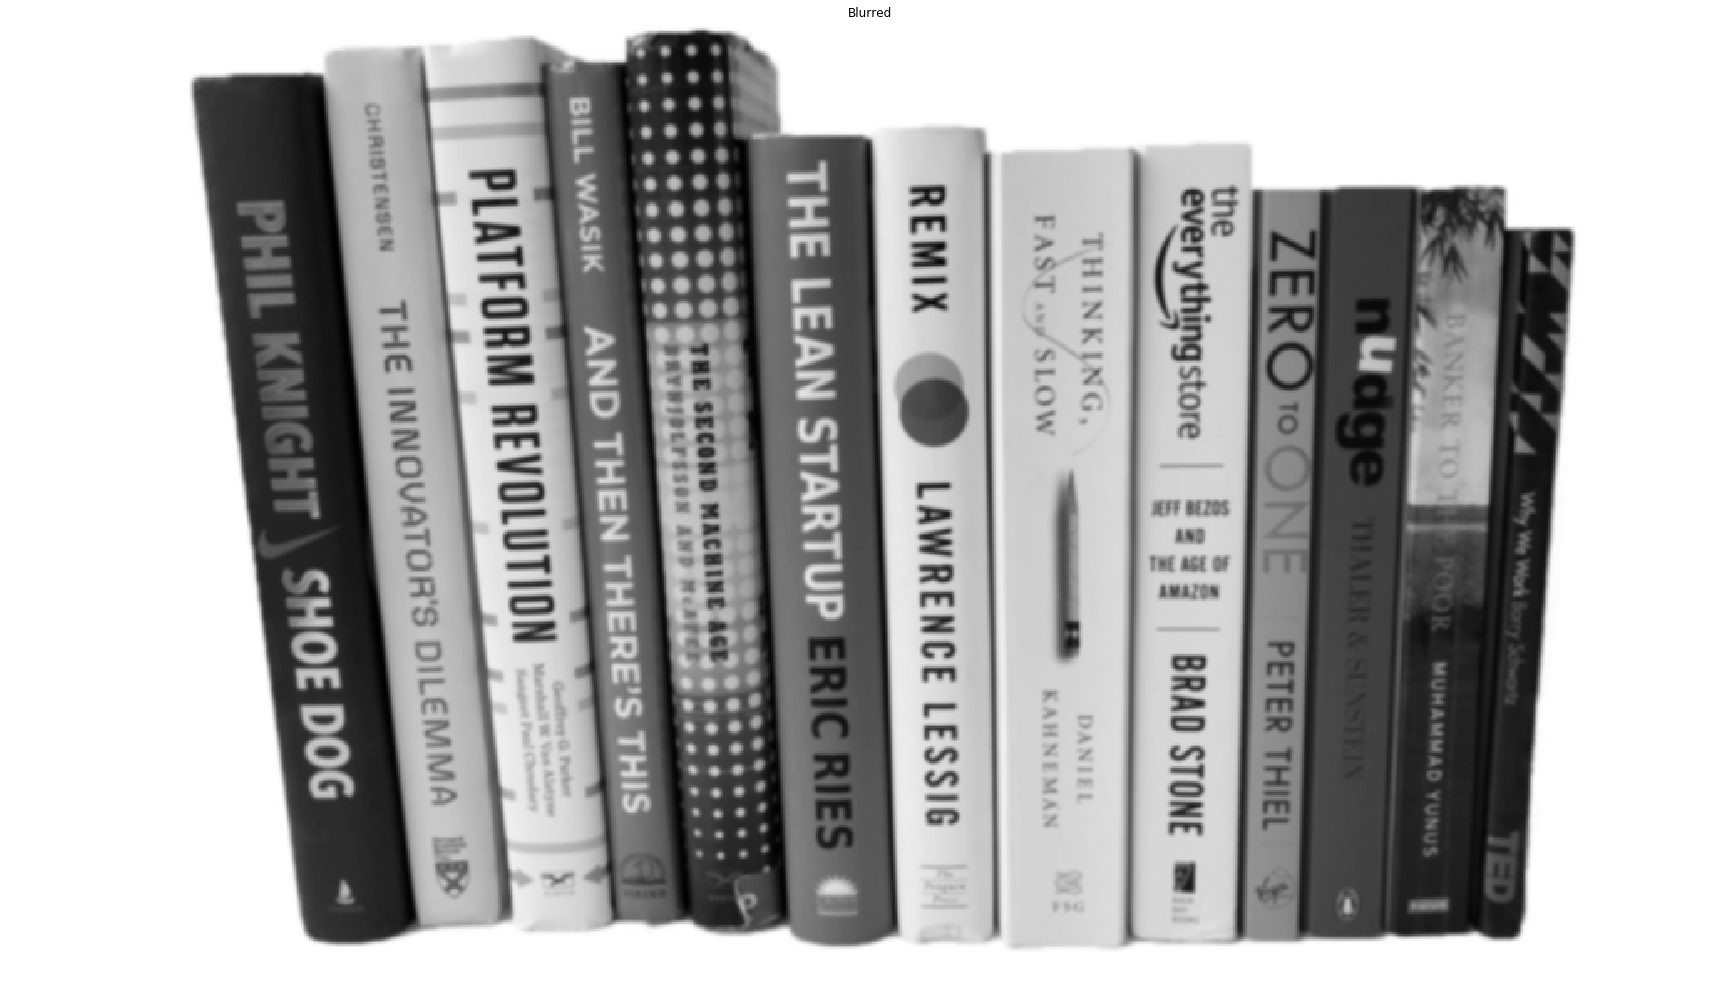

In [11]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure(figsize=(30,30)),plt.imshow(blur,cmap = 'gray'),plt.title('Blurred'),plt.axis('off')
plt.show()

#### Canny Edge Detection

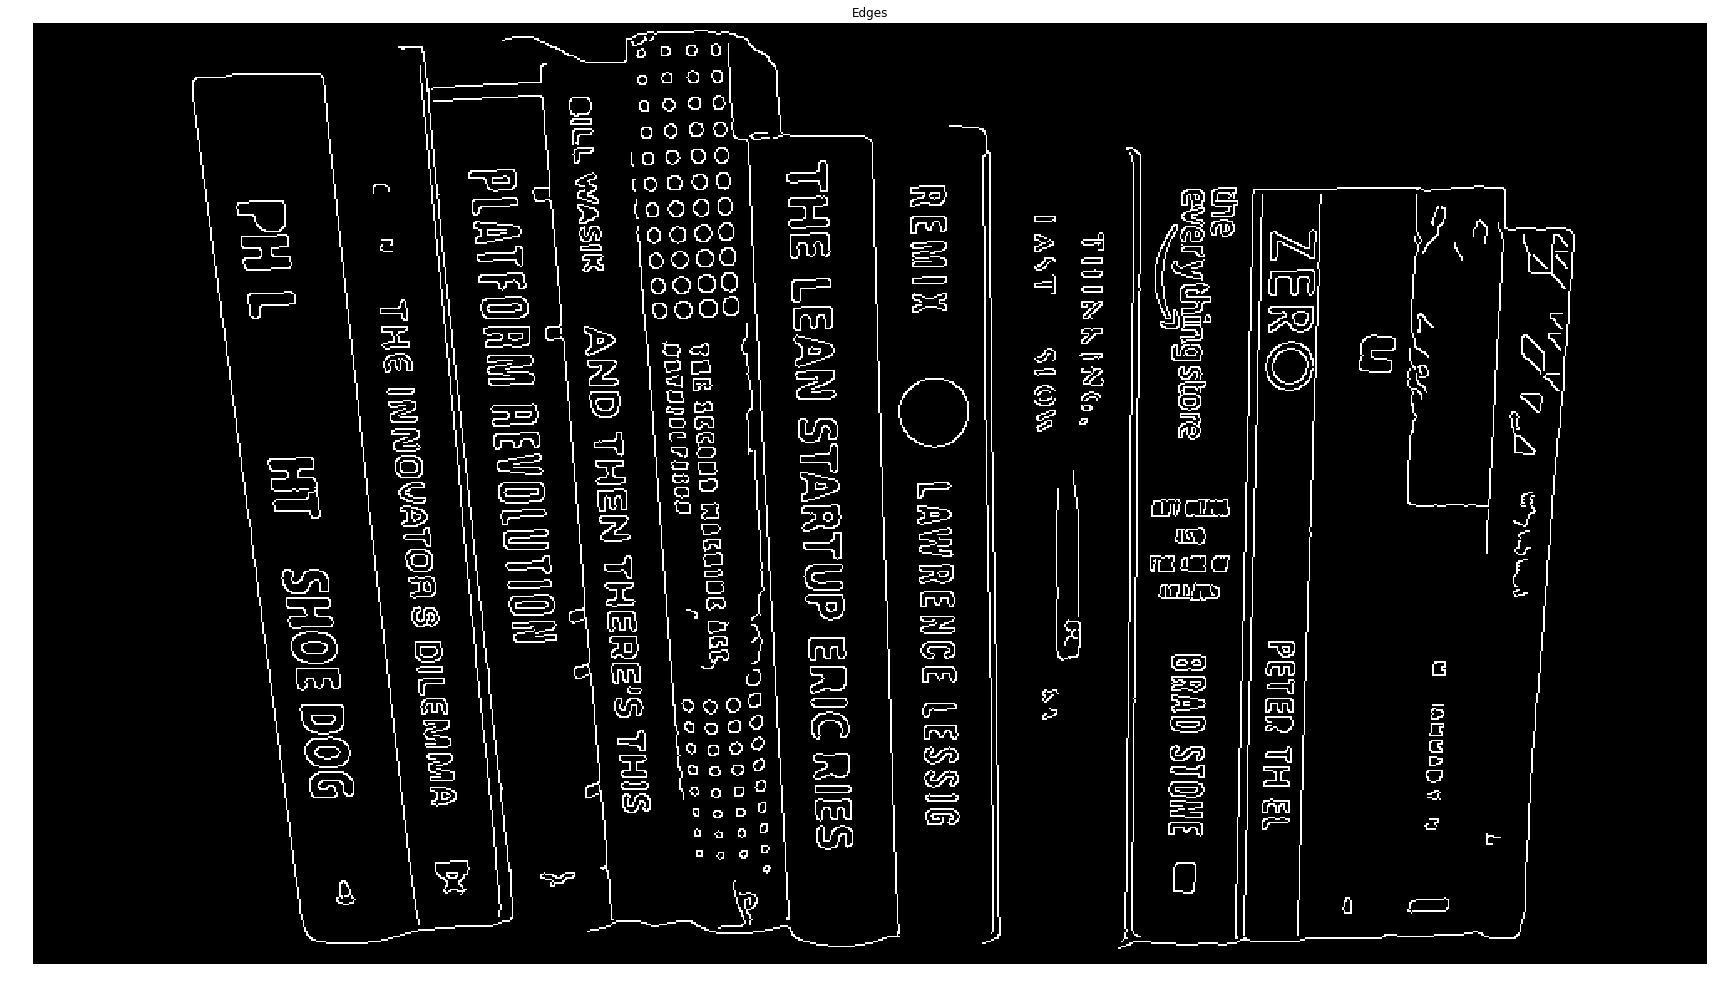

In [12]:
def auto_canny(image, sigma=0.25):
    v = np.mean(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper, apertureSize = 3, L2gradient = True)
    return edged

edges = auto_canny(blur)
plt.figure(figsize=(30,30)),plt.imshow(edges,cmap = 'gray'),plt.title('Edges'),plt.axis('off')
plt.show()

#### Hough Lines Transformation

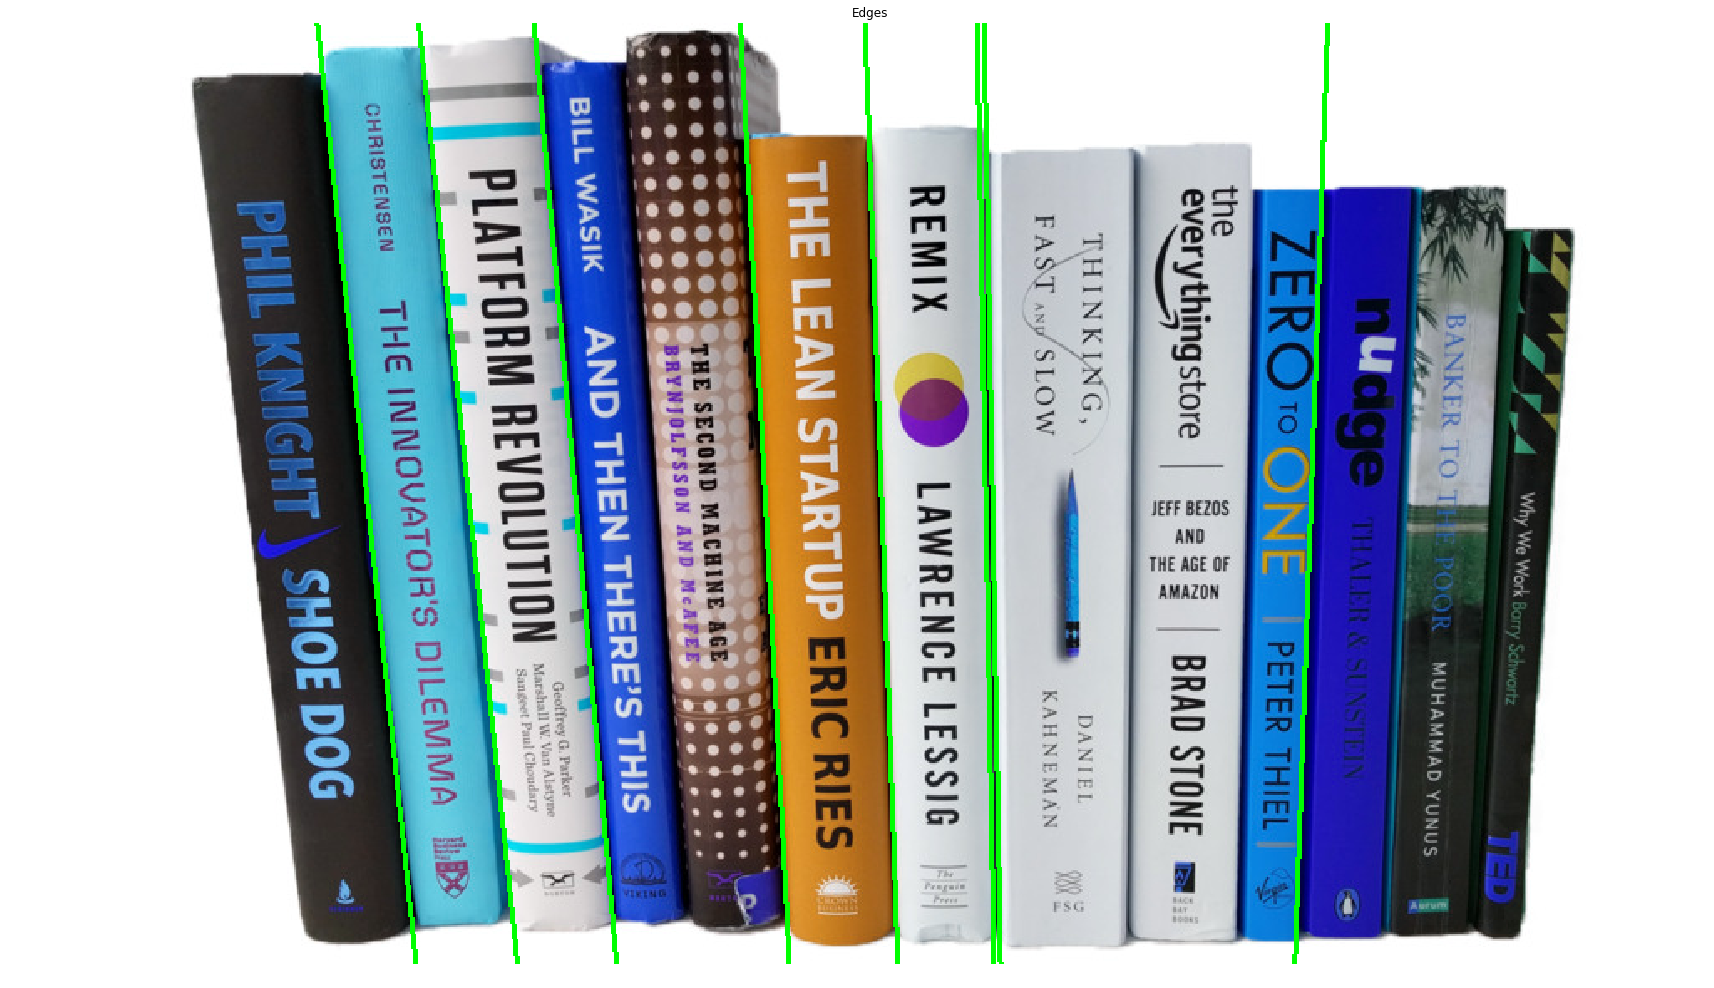

True

In [13]:
lines = cv2.HoughLines(edges,1,np.pi/180, 200)
start_line = lines[0][0][0]
count = 0
for line in lines:
    a = np.cos(line[0][1])
    b = np.sin(line[0][1])
    x0 = a*line[0][0]
    y0 = b*line[0][0]
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    if abs(line[0][0]-start_line)<30:
        if count>=1:
            count += 1
            continue
            
        else:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
            count += 1
                
    else:
        start_line = line[0][0]
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        count += 1

cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(30,30)),plt.imshow(img,cmap = 'gray'),plt.title('Edges'),plt.axis('off')
plt.show()
cv2.imwrite('Segmented.jpg',img)